## More Iowa 2D Pareto fronts
This notebook explores the tradeoffs between districting criteria using a dataset of 10,000 county-level Iowa districting plans collected using GerryChain's random single flip algorithm with a population bound of ±2%.

In our last experiment, we identified these pairings as particularly interesting examples of tradeoffs:
- Absolute/squared population deviation vs. cut edges
- Absolute mean-median gap vs. cut edges

This notebook continues our exploration of these tradeoffs with a different sample. Columns:
- `cut_edges_pct`: Percent of cut edges (relative to total edges)
- `pop_dev_pct`: Average percent population deviation across districts
- `egs`: Efficiency gap (2000 Presidential election)
- `mms`: Mean-median score (2000 Presidential election)
- `pol_pop`: Polsby-Popper score

In [126]:
%config InlineBackend.figure_formats = ['svg']

import pandas as pd
import pareto
import matplotlib.pyplot as plt; plt.style.use('ggplot')

In [132]:
data = pd.read_csv('data/IA_counties_run_2_flip_10000.csv')
data['pop_dev_pct_abs'] = abs(data['pop_dev_pct'])  # Absolute average population 
data['pop_dev_pct_squared'] = data['pop_dev_pct']**2
data['mms_abs'] = abs(data['mms'])
collection = pareto.ParetoCollection(updaters=list(data.columns))

In [133]:
collection.add(data.to_dict(orient='records'))

In [134]:
data.columns

Index(['cut_edges_pct', 'pop_dev_pct', 'egs', 'mms', 'pol_pop',
       'pop_dev_pct_abs', 'pop_dev_pct_squared', 'mms_abs'],
      dtype='object')

In [156]:
def plot_front(x_col, y_col, maxima=False):
    front = collection.front([x_col, y_col], maxima=maxima)
    x = [plan[x_col] for plan in collection.points]
    y = [plan[y_col] for plan in collection.points]
    pareto_x = [plan[x_col] for plan in front]
    pareto_y = [plan[y_col] for plan in front]

    plt.scatter(x, y)
    front_type = 'maxima' if maxima else 'minima'
    plt.scatter(pareto_x, pareto_y, label=f'Pareto front ({front_type})')
    plt.legend()

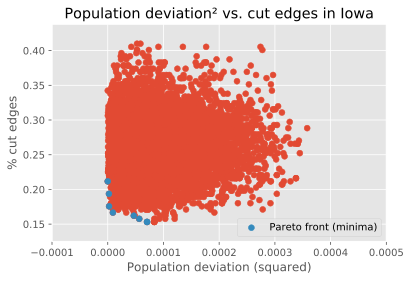

In [157]:
plot_front('pop_dev_pct_squared', 'cut_edges_pct')
plt.xlabel('Population deviation (squared)')
plt.ylabel('% cut edges')
plt.title('Population deviation² vs. cut edges in Iowa')
plt.savefig('results/IA_counties_run_2_flip_10000/squared_population_deviation_vs_cut_edges.png', dpi=300)
plt.xlim(-0.0001, 0.0005)
plt.show()

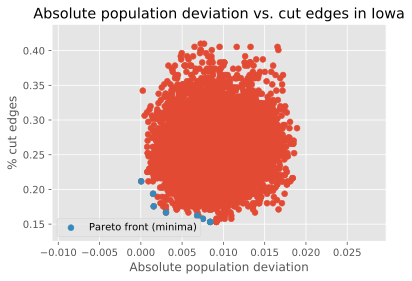

In [158]:
plot_front('pop_dev_pct_abs', 'cut_edges_pct')
plt.xlabel('Absolute population deviation')
plt.ylabel('% cut edges')
plt.title('Absolute population deviation vs. cut edges in Iowa')
plt.savefig('results/IA_counties_run_2_flip_10000/absolute_population_deviation_vs_cut_edges.png', dpi=300)
plt.show()

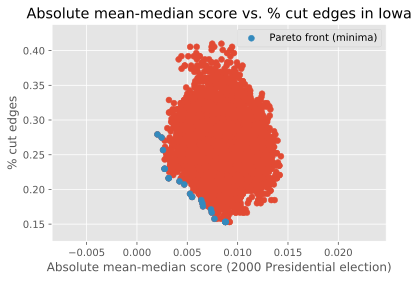

In [161]:
plot_front('mms_abs', 'cut_edges_pct')
plt.xlabel('Absolute mean-median score (2000 Presidential election)')
plt.ylabel('% cut edges')
plt.title('Absolute mean-median score vs. % cut edges in Iowa')
plt.savefig('results/IA_counties_run_2_flip_10000/absolute_mean_median_vs_cut_edges.png', dpi=300)
plt.show()